###### Data Set Taken from https://www.kaggle.com/mrisdal/2016-us-presidential-debates

In [237]:
import pandas as pd

In [238]:
df = pd.read_csv("debate.csv", encoding = "ISO-8859-1")

In [239]:
df.head()

,Line,Speaker,Text,Date
0,1,Holt,Good evening from Hofstra University in Hempst...,9/26/16
1,2,Audience,(APPLAUSE),9/26/16
2,3,Clinton,"How are you, Donald?",9/26/16
3,4,Audience,(APPLAUSE),9/26/16
4,5,Holt,Good luck to you.,9/26/16


In [240]:
#Anything interesting from the audience that we care about? 
df[df['Speaker'] == 'Audience'].groupby(['Text']).count()

,Line,Speaker,Date
Text,,,
(APPLAUSE),21,21,21
(LAUGHTER),15,15,15


In [241]:
#Only Applauses or Laughter, Let's only get rows with Trump or Clinton for now..
df = df[(df['Speaker'] == 'Trump') | (df['Speaker'] == 'Clinton')]

In [242]:
#How many days worth of campaigns do we have? 
df.groupby(['Date']).count()

,Line,Speaker,Text
Date,,,
10/19/2016,215,215,215
10/9/16,155,155,155
9/26/16,228,228,228


In [243]:
#Let's remove the Line col & date
df.drop('Line', axis=1, inplace=True)
df.drop('Date', axis=1, inplace=True)

In [244]:
df.head()

,Speaker,Text
2,Clinton,"How are you, Donald?"
7,Clinton,"Well, thank you, Lester, and thanks to Hofstra..."
8,Clinton,I also want to see more companies do profit-sh...
10,Trump,"Thank you, Lester. Our jobs are fleeing the co..."
11,Trump,"We cannot let it happen. Under my plan, I'll b..."


In [245]:
#Candidate distribution
df.groupby(['Speaker']).count()

,Text
Speaker,
Clinton,243
Trump,355


In [246]:
# References
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://www.nltk.org/
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer

In [251]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(sen, stopwords=stop_words):
    punct = [',','.',"'",'!',';','?','-']
    #tokens = word_tokenize(sen)
    tt = TweetTokenizer()
    tokens = tt.tokenize(sen)
    tokens = [word for word in tokens if word not in stopwords and word not in punct]
    return " ".join(tokens) #Don't want an array, want one sentence

In [252]:
#Test to see if our funct works..
remove_stopwords('This is my sample sentence. Let\'s see if it works')

"This sample sentence Let's see works"

In [253]:
#Let's remove sotpwords.
df['Text'] = df['Text'].apply(remove_stopwords)

In [254]:
#sample with stopwords removed.. 
df['Text'].loc[7]

"Well thank Lester thanks Hofstra hosting us The central question election really kind country want kind future we'll build together Today granddaughter's second birthday I think lot First build economy works everyone top That means need new jobs good jobs rising incomes I want us invest I want us invest future That means jobs infrastructure advanced manufacturing innovation technology clean renewable energy small business new jobs come small business We also make economy fairer That starts raising national minimum wage also guarantee finally equal pay women's work"

In [255]:
# Reference:
# O'Reilly, Jake VanderPlas
# Python Data Science Handbook, pg. 386-388
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [256]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [257]:
model.fit(train['Text'], train['Speaker'])

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...   vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [258]:
pred = model.predict(test['Text'])

In [259]:
print(model.classes_)
print(confusion_matrix(test['Speaker'], pred))
print("Accurracy:", accuracy_score(test['Speaker'], pred)) 
print("")

['Clinton' 'Trump']
[[21 30]
 [ 0 69]]
Accurracy: 0.75



In [260]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

clfs = [MultinomialNB(), BernoulliNB(), RandomForestClassifier(), MLPClassifier()]
title = ['MultinomialNB', 'BernoulliNB', 'RandomForestClassifier', 'MLPClassifier']

for t,clf in zip(title, clfs):
    model = make_pipeline(TfidfVectorizer(), clf)
    model.fit(train['Text'], train['Speaker'])
    pred = model.predict(test['Text'])
    print(t,"Performance\n=========================")
    print(model.classes_)
    print(confusion_matrix(test['Speaker'], pred))
    print("Accurracy:", accuracy_score(test['Speaker'], pred)) 
    print("")

MultinomialNB Performance
['Clinton' 'Trump']
[[21 30]
 [ 0 69]]
Accurracy: 0.75

BernoulliNB Performance
['Clinton' 'Trump']
[[17 34]
 [ 3 66]]
Accurracy: 0.691666666667

RandomForestClassifier Performance
['Clinton' 'Trump']
[[28 23]
 [10 59]]
Accurracy: 0.725

MLPClassifier Performance
['Clinton' 'Trump']
[[38 13]
 [ 5 64]]
Accurracy: 0.85



TRUMP


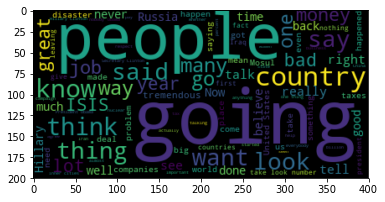

In [279]:
# Reference: https://github.com/amueller/word_cloud
from wordcloud import WordCloud

#Combine all lines for each candidate
trump = ''.join(df[df['Speaker'] == 'Trump']['Text'])
clinton = ''.join(df[df['Speaker'] == 'Clinton']['Text'])

print("TRUMP")
wc = WordCloud(max_words=100).generate(trump)
plt.imshow(wc.recolor(),
           interpolation="bilinear")
plt.show()

Clinton


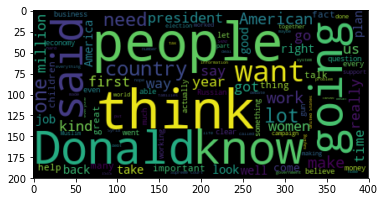

In [280]:
print("Clinton")
wc = WordCloud(max_words=100).generate(clinton)
plt.imshow(wc.recolor(),
           interpolation="bilinear")
plt.show()

{'mlpclassifier': MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
        beta_2=0.999, early_stopping=False, epsilon=1e-08,
        hidden_layer_sizes=(100,), learning_rate='constant',
        learning_rate_init=0.001, max_iter=200, momentum=0.9,
        nesterovs_momentum=True, power_t=0.5, random_state=None,
        shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
        verbose=False, warm_start=False),
 'tfidfvectorizer': TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=1.0, max_features=None, min_df=1,
         ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
         stop_words=None, strip_accents=None, sublinear_tf=False,
         token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
         vocabulary=None)}